Found 107 images
Batch size: 100


Vision for 0 month old infant:
Average loading time for 0 months: 2.7268413400650022


Vision for 1 month old infant:
Average loading time for 1 months: 2.8181400156021117


Vision for 2 month old infant:
Average loading time for 2 months: 2.9367863178253173


Adult Vision:
Average loading time for adult vision: 0.06724143743515015


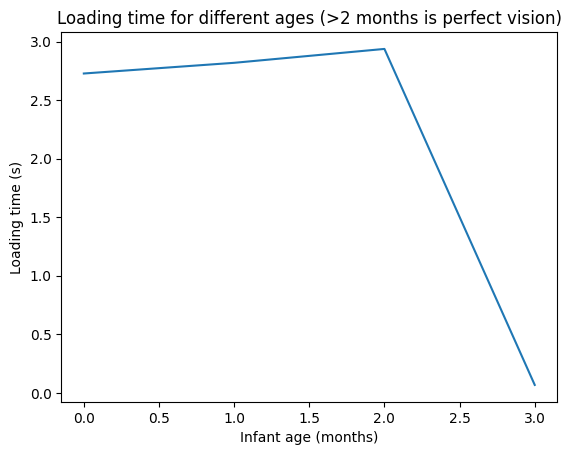

In [1]:
"""Script to test the loading time of the dataloader
for different infant ages vs adult vision"""

import torch as t
from data import CustomDataset
from matplotlib import pyplot as plt
import time

train_dataset = CustomDataset(data_type="jpeg", mode="train")
batch_size = 100
print("Batch size:", batch_size)
loading_times = []
for infant_age in range(4):
    train_dataset.infant_age = infant_age
    if infant_age < 3:
        print(
            f"\n\nVision for {train_dataset.infant_age} month old infant:",
        )
    else:
        print("\n\nAdult Vision:")

    train_dl = t.utils.data.DataLoader(
        train_dataset,
        batch_size=batch_size,
        drop_last=True,
        shuffle=True,
        num_workers=1,
    )

    loading_start_time = time.time()
    (x, y) = next(iter(train_dl))
    current_time = time.time()
    average_loading_time = (current_time - loading_start_time) / batch_size
    loading_times.append(average_loading_time)

    if infant_age < 3:
        print(
            f"Average loading time for {train_dataset.infant_age} months:",
            average_loading_time,
        )
    else:
        print("Average loading time for adult vision:", average_loading_time)

plt.figure()
plt.plot(loading_times)
plt.title(f"Loading time for different ages (>2 months is perfect vision)")
plt.xlabel("Infant age (months)")
plt.ylabel("Loading time (s)")
plt.savefig("Loading_times.png")
